### Zadanie 1

Podpunkt a)
Wariancja estymatora 1 0.020110135045855158
Błąd średniokwadratowy estymatora 1 0.020110135529317535
Obciążenie estymatora 1 2.1987777930387864e-05
Wariancja estymatora 2 0.030730972015787096
Błąd średniokwadratowy estymatora 2 0.030730982764182613
Obciążenie estymatora 2 0.00010367446899550714
Wariancja estymatora 3 0.0348324628199105
Błąd średniokwadratowy estymatora 3 0.03483255200994045
Obciążenie estymatora 3 0.000298646998896146
Wariancja estymatora 4 0.009751016270686332
Błąd średniokwadratowy estymatora 4 0.010555165663484144
Obciążenie estymatora 4 -0.028357527974028574
Podpunkt b)
Wariancja estymatora 1 0.02011013504585516
Błąd średniokwadratowy estymatora 1 0.02011013552931754
Obciążenie estymatora 1 2.1987777929943775e-05
Wariancja estymatora 2 0.030730972015787096
Błąd średniokwadratowy estymatora 2 0.03073098276418262
Obciążenie estymatora 2 0.00010367446899550714
Wariancja estymatora 3 0.03483246281991048
Błąd średniokwadratowy estymatora 3 0.0348325520099404

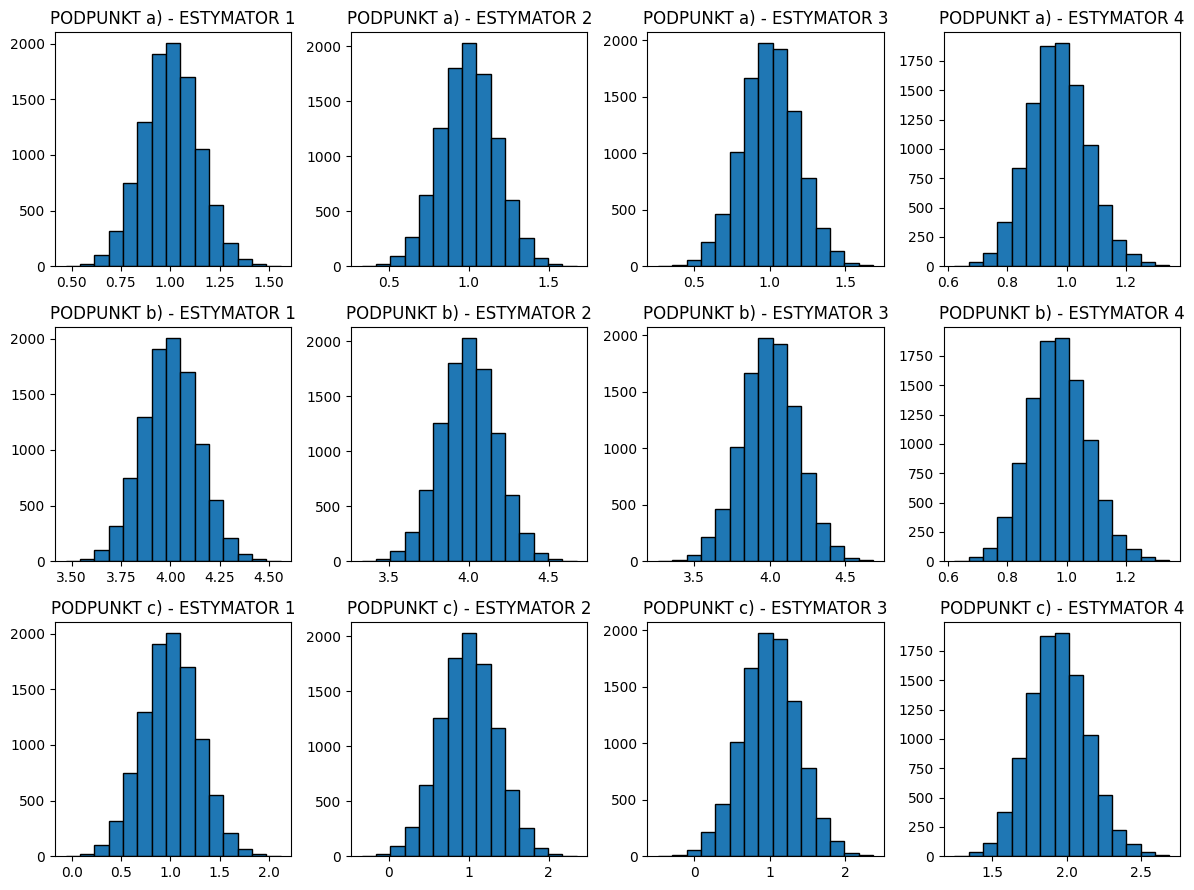

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import ndtri

n = 50

N = 10000
theta = [1, 4, 1]
sigma = [1, 1, 2]
name = ['a)', 'b)', 'c)']
np.random.seed(0)

weights3 = np.random.dirichlet(np.ones(n))

weights4 = []

for i in range(1, n + 1):
    lower_bound = stats.norm.ppf((i - 1) / n)
    upper_bound = stats.norm.ppf(i / n)
    weight = stats.norm.pdf(lower_bound) - stats.norm.pdf(upper_bound)
    weights4.append(weight)

def est1(data):
    return np.mean(data)

def est2(data):
    return np.median(data)

def est3(data):
    e3 = 0
    for j in range(len(data)):
        e3 += weights3[j] * data[j]
    return e3

def est4(data):
    sdata = data
    sdata.sort()
    e4 = 0
    for j in range(len(sdata)):
        e4 += weights4[j] * sdata[j]
    return e4

estymator = np.empty((N, 4))

plt.figure(figsize=(12, 9))  

for j in range(3):
    print('Podpunkt', name[j])
    for i in range(N):
        np.random.seed(i)
        data = np.random.normal(theta[j], sigma[j], n)
        estymator[i][0] = est1(data)
        estymator[i][1] = est2(data)
        estymator[i][2] = est3(data)
        estymator[i][3] = est4(data)

    for i in range(4):
        est = estymator[:, i]

        plt.subplot(3, 4, i + 1 + j * 4)  
        plt.hist(est, bins=15, edgecolor='black')
        plt.title('PODPUNKT ' + name[j] + ' - ESTYMATOR ' + str(i + 1))

        print('Wariancja estymatora', i + 1, est.var())
        true = np.full(N, theta[j])
        errors = est - true
        squared = errors ** 2
        mse = np.mean(squared)
        o = np.mean(est) - theta[j]

        print('Błąd średniokwadratowy estymatora', i + 1, mse)
        print('Obciążenie estymatora', i + 1, o)

plt.tight_layout()  
plt.show()


Wybrane przeze mnie wagi w przypadku estymatora $\theta_3$ są zadane rozkładem Dirichleta. Rozkład Dirichleta jest parametryzowany wektorem dodatnich wartości, a w tym przypadku używam wektora składającego się z samych jedynek, co oznacza rozkład Dirichleta o jednakowym stężeniu. Warunek dotyczący sumowalności wag do $1$ jest spełniony. 

Możemy zaobserwować dość dużą dokładność każdego z czterech estymatorów, jednak estymator $\theta_4$ wyraźnie odbiega od reszty. Można to w szczególności zauważyć, analizując histogramy. Za każdym razem średnia wartość jest przesunięta od właściwej, prawdziwej wartości parametru. W definicji tego estymatora zostały użyte funkcje z rozkładu $N(0,1)$, jednak co ciekawe, sprawdzając jego poprawność nawet w przypadku $ N(0,1)$ dostajemy niedokładne wyniki. Na podstawie przeprowadzonych eksperymentów możemy zatem stwierdzić, że $\theta_4$ jest słabym estymatorem, chociaż cechuje się stosunkowo małą wariancją.

### Zadanie 2
Komenda set.seed(1) dotyczy języka R. Odpowiednikiem w Pythonie jest np.random.seed(1). Jest to polecenie, które ustawia początkowy stan generatora liczb pseudolosowych (RNG) na określoną wartość (w tym przypadku na 1). W R generator liczb pseudolosowych jest używany do generowania liczb losowych, ale te liczby są deterministyczne, co oznacza, że ustawienie początkowego stanu generatora (za pomocą set.seed()), powoduje, że za każdym razem, gdy uruchomiony zostanie kod z tą samą wartością początkową, program zwróci te same "losowe" wyniki.

Zastosowania:

* Reprodukowalność wyników: Ustawienie ziarna (seed) pozwala na reprodukowanie tych samych wyników w eksperymentach, które wykorzystują losowość. Jest to przydatne w pracy nad analizą danych lub eksperymentem, gdy chcemy mieć pewność, że inni badacze mogą odtworzyć uzyskane przez nas wyniki.

* Testowanie i debugowanie: Ustawienie ziarna pozwala na kontrolowanie losowości podczas testowania i debugowania kodu. Dzięki temu możemy śledzić, czy błędy występują w określonych warunkach.


* Porównywanie algorytmów: Gdy porównujemy różne algorytmy lub strategie w oparciu o te same dane wejściowe, ustawienie ziarna pozwala na równą szansę na losowe wybory w różnych podejściach.

### Zadanie 3 

Podany w podręczniku przykład ilustruje standardową sytuację, w której, w celu znalezienia estymatora największej wiarogoności, szukamy ekstremów funkcji wiarogodności. Jak wiemy, w tym celu równoważnie możemy badać funkcję log-wiarogodności. Napotykamy jedank na problem, jakim jest znalezienie konkretnych rozwiązań równania $ \frac{{dl}}{{d\theta}} = 0 $. Badając granice pokazano, że takie rozwiązanie istnieje. Wiemy także, że  $ \frac{{d^2l}}{{d\theta^2}} < 0 $, a zatem w poszukiwanym punkcie znajduje się maksimum. To dostarcza nam wszytskich potrzebnych informacji, by stwierdzić, że rozwiązanie równaniania $ \frac{{dl}}{{d\theta}} = 0 $ rzeczywiście wyznacza estymator największej wiarogodości. Problemem pozostaje jego dokładne obliczenie. Wiedząc o jego istnieniu możemy zastosować metody numeryczne takie jak np. metoda Newtona, która jest zazwyczaj dobrym wyborem, bo charakteryzuje się relatywnie szybką (kwadratową) zbieżnością.

### Zadanie 4

Metoda Newtona jest metodą iteracyjną, służącą do wyznaczenia przybliżonej wartości miejsca zerowego, czyli rozwiązania równania $f(x)=0 $ dla danej funkcji $f(x).$ W większości przypadków jest kwadratowo zbieżna. 

Aby rozpocząć algorytm, konieczne jest podanie początkowego przybliżenia rozwiązania, które oznaczmy jako  $ x_0 $​.

Metoda Newtona polega na iteracyjnym poprawianiu przybliżonego rozwiązania. Proces ten powtarza się, aż osiągnięte zostanie akceptowalnie dokładne przybliżenie rozwiązania lub wykonana zostanie ustalona liczba iteracji. Każda iteracja polega na obliczeniu nowego przybliżonego rozwiązania  $ x_{n+1} $​ za pomocą wzoru: $ x_{n+1}= x_n - \frac{f(x_n)}{f'(x_n)} $​ .

Geometrycznie proces polega na wyznaczaniu równania stycznej do wykresu funkcji w punkcie $ (x_n ,f (x_n)) $ , a następnie odciętej 
$ x_{n+1}$ punktu przecięcia tej stycznej z osią OX. Odcięta $ x_{n+1} $ jest drugim przybliżeniem szukanego rozwiązania. 

W naszym przypadku, gdy szukamy rozwiązania równania $ l'(\theta) = 0 $, wzór iteracyjny przyjmuje postać: $ \theta_{n+1}= \theta_n - \frac{l'(\theta_n)}{l''(\theta_n)} $


### Zadanie 5

Zapisujemy funkcję wiarogodności:

$  L(\theta ) = \prod_{i=1}^{n} \frac{1}{\sigma} \cdot \frac{\exp(-(x_i - \theta)/\sigma)}{[1 + \exp(-(x_i - \theta)/\sigma)]^2} 
 $

Obliczamy funkcję log-wiarogodności:

$ l(\theta)=\ln(L(\theta)) = \sum_{i=1}^{n} \left( -\ln(\sigma) - \frac{x_i - \theta}{\sigma} - 2\ln(1 + \exp(-(x_i - \theta)/\sigma)) \right) $


Liczymy pochodną funkcji log-wiarogodności:

$ \frac{dl(\theta)}{d\theta} = \sum_{i=1}^{n} \left( \frac{1}{\sigma}  - \frac{2}{\sigma}\frac{\exp(-(x_i - \theta)/\sigma)}{1 + \exp(-(x_i - \theta)/\sigma)} \right) $


Przyrównując do 0 i przekształcając otrzymujemy:
$ \sum_{i=1}^{n} \left(\frac{\exp(-(x_i - \theta)/\sigma)}{1 + \exp(-(x_i - \theta)/\sigma)} \right) =\frac{n}{2}$



Wiemy, że $\frac{d^2}{d\theta^2}l(\theta) >0$, zatem lewa strona równania jest funkcją ściśle rosnącą względem $ \theta $. Zbliża się do 0, gdy $ \theta  \to -\infty$ i zbliża się do $n$, gdy $ \theta \to +\infty $.

Wobec tego maximum istnieje w punkcie będącym rozwiązaniem $ \frac{dl(\theta)}{d\theta} = 0 $. Do jego wyznaczenia skorzystamy z metody Newtona.


$\frac{d^2}{d\theta^2}l(\theta) = \frac{1}{\sigma}\sum_{i=1}^{n} \left(\frac{\exp(-(x_i - \theta)/\sigma)}{(1 + \exp(-(x_i - \theta)/\sigma))^2} \right) $


Podpunkt a)
Wariancja estymatora 0.06018965175992862
Błąd średniokwadratowy estymatora 0.060199822071752986
Obciążenie estymatora 0.003189092633393509
Podpunkt b)
Wariancja estymatora 0.06018965175992863
Błąd średniokwadratowy estymatora 0.060199822071752986
Obciążenie estymatora 0.0031890926333932867
Podpunkt c)
Wariancja estymatora 0.24075860703971452
Błąd średniokwadratowy estymatora 0.24079928828701194
Obciążenie estymatora 0.006378185266787018


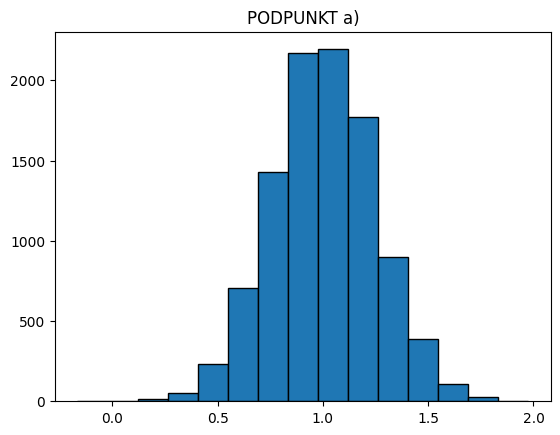

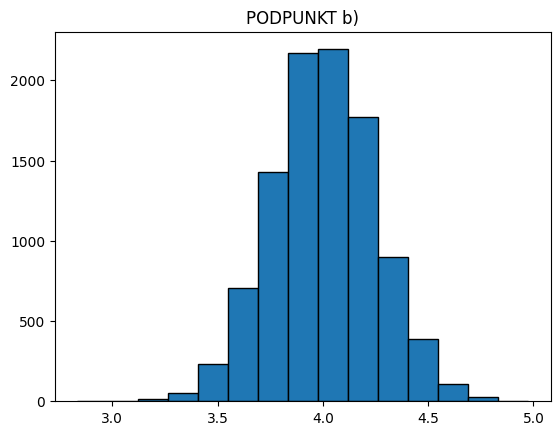

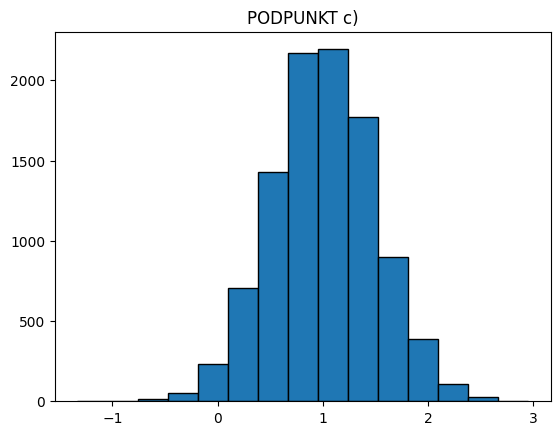

In [10]:


def f(sigma, data, theta): #dl/dtheta
    sum=0
    for i in range(len(data)):
        s=np.exp(-(data[i]-theta)/sigma)
        sum+=(s/(1+s))
    return sum-len(data)/2

def f1(sigma,data,theta): #d^2l/dtheta^2
    sum=0
    for i in range(len(data)):
        s=np.exp(-(data[i]-theta)/sigma)
        sum+=(s/((1+s)*(1+s)))
    return sum/sigma
    
    
    
def newton_method(f, df, x0,data,sig, tol=1e-3, max_iter=5):
  
    x = x0
    iterations = 0

    while iterations < max_iter:
        fx = f(sig,data,x)
        if abs(fx) < tol:
            return x, iterations

        dfx = df(sig,data,x)
        if dfx == 0:
            raise ValueError("Derivative is zero. Newton method can't continue.")
        
        x = x - fx / dfx
        iterations += 1

    raise ValueError("Newton method did not converge within the maximum number of iterations.")


n=50
N=10000
theta=[1,4,1]
sigma=[1,1,2]
name=['a)', 'b)', 'c)']


for j in range(3):
    print('Podpunkt',name[j])
    est=[]
    for i in range(N):
        np.random.seed(i)
        data=np.random.logistic(theta[j], sigma[j], n)
        est.append(newton_method(f,f1,np.mean(data),data,sigma[j])[0])
        #est.append(newton_method(f,f1,0,data,sigma[j])[0])
    est=np.array(est)

    plt.figure()  
    plt.hist(est, bins=15, edgecolor='black')
    plt.title('PODPUNKT '+name[j])
    print('Wariancja estymatora', est.var())

    true=np.full(N,theta[j])
    errors=est-true
    squared=errors**2
    mse=np.mean(squared)
    o=np.mean(est)-theta[j]
    
        
    print('Błąd średniokwadratowy estymatora', mse)
    print('Obciążenie estymatora', o)





Można zaobserwować, że dla dobrze dobranego punktu początkowego - np. średniej próbkowej - otrzymujemy dość dokładne estymacje dla każdego z podpunktów, czyli niezależnie od wartości $\theta $. Dodatkowo, liczba kroków algorytmu jest mała - wystarczające wyniki otrzymujemy nawet dla mniej niż 5 iteracji. Z kolei przyjmując inny punkt początkowy np. $\theta_0=0$, dla $\theta=1$ otrzymujemy zadowalające przybliżenie, ale w przypadku gdy właściwa wartość $\theta =4$ algorytm Newtona nie zbiega nawet dla większej liczby kroków. Może być to spowodowane błędami numerycznymi wynikającymi z samodzielnej implementacji metody Newtona.

Jednak nadal metoda Newtona radzi sobie lepiej, niż np. biblioteczna metoda siecznych:

Podpunkt a)
Wariancja estymatora 0.10547067060014692
Wariancja estymatora 0.10547067060014692
Błąd średniokwadratowy estymatora 1.6501854680443921
Obciążenie estymatora -1.2428655588776467
Podpunkt b)
Wariancja estymatora 0.10547067060014692
Wariancja estymatora 0.10547067060014692
Błąd średniokwadratowy estymatora 1.6501854680443924
Obciążenie estymatora -1.2428655588776465
Podpunkt c)
Wariancja estymatora 0.42188268240057586
Wariancja estymatora 0.42188268240057586
Błąd średniokwadratowy estymatora 6.60074187217765
Obciążenie estymatora -2.485731117755312


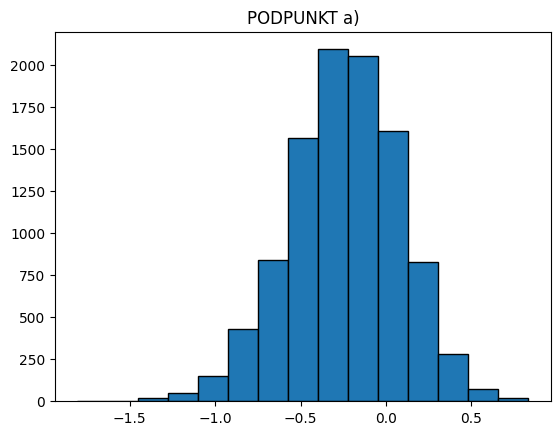

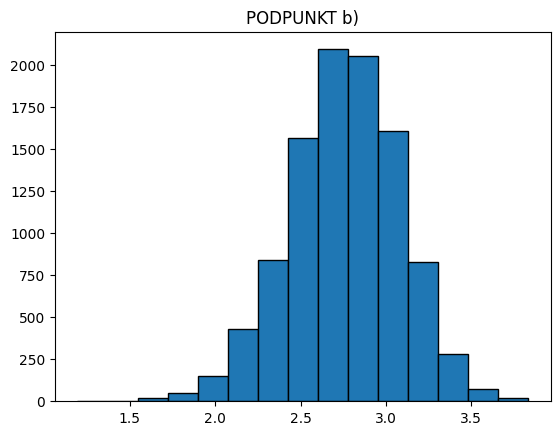

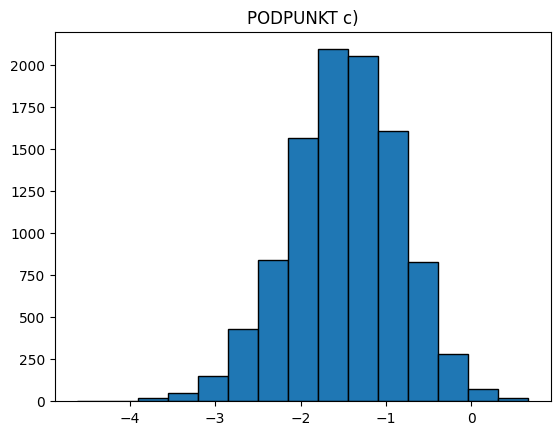

In [26]:
import numpy as np
from scipy import optimize

n = 50
N = 10000
theta = [1, 4, 1]
sigma = [1, 1, 2]
name = ['a)', 'b)', 'c)']

def likelihood_function(theta, sigma, data):
    return -np.sum(np.log(1 + np.exp(-(data - theta) / sigma))) + len(data) / 2

for j in range(3):
    print('Podpunkt', name[j])
    est = []
    for i in range(N):
        np.random.seed(i)
        data = np.random.logistic(theta[j], sigma[j], n)
        initial_guess = np.mean(data) 
        result = optimize.root_scalar(lambda x: likelihood_function(x, sigma[j], data), x0=initial_guess, bracket=[min(data), max(data)], method='secant')
        est.append(result.root)
    est = np.array(est)
    plt.figure()  
    plt.hist(est, bins=15, edgecolor='black')
    plt.title('PODPUNKT '+name[j])
    print('Wariancja estymatora', est.var())
    print('Wariancja estymatora', est.var())

    true=np.full(N,theta[j])
    errors=est-true
    squared=errors**2
    mse=np.mean(squared)
    o=np.mean(est)-theta[j]
    
        
    print('Błąd średniokwadratowy estymatora', mse)
    print('Obciążenie estymatora', o)



### Zadanie 6

Zapisujemy funkcję wiarogodności:

$ L(\theta) = \frac{1}{(\pi\sigma)^n} \prod_{1}^{n} \frac{1}{1 + (\frac{x_i - \theta}{\sigma})^2}=\frac{1}{(\pi\sigma)^n}  \frac{1}{\prod_{1}^{n} [1 + (\frac{x_i - \theta}{\sigma})^2]} $

Funkcja log-wiarogodności:

$l(\theta)=-nlog(\pi\sigma)-\sum_{1}^{n}log[1 + (\frac{x_i - θ}{\sigma})^2]$

Chcemy zmaksymalizować funkcję log-wiarogodności, zatem liczymy pochodną.

$ \frac{dl(\theta)}{d\theta} = \frac{2}{\sigma^2} \sum_{1}^{n}\frac{x_i - θ}{1 + (\frac{x_i - θ}{\sigma})^2} $


Rozwiązanie tego równania wymaga znalezienia pierwiastków wielomianu $2n-1$ stopnia, a zatem posiada $2n-1$ pierwiastków - ich liczba rośnie wraz ze wzrostem rozmiaru próby.

Trudno jest znaleźć bezpośrednie rozwiązanie rówania $ \frac{dl(\theta)}{d\theta}=0 $. Skorzystamy z metody Newtona - liczymy drugą pochodną:

$ \frac{d^2l(\theta)}{d\theta^2} = \frac{2}{\sigma^2}  \sum_{1}^{n}\frac{(\frac{x_i - θ}{\sigma})^2-1}{[1 + (\frac{x_i - θ}{\sigma})^2]^2} $


Podpunkt a)
Wariancja estymatora 0.04181843145562352
Wariancja estymatora 0.04181843145562352
Błąd średniokwadratowy estymatora 0.041818881503404653
Obciążenie estymatora 0.0006708560062522739
Podpunkt b)
Wariancja estymatora 0.041818431455623535
Wariancja estymatora 0.041818431455623535
Błąd średniokwadratowy estymatora 0.04181888150340466
Obciążenie estymatora 0.0006708560062529401
Podpunkt c)
Wariancja estymatora 0.16726398415261387
Wariancja estymatora 0.16726398415261387
Błąd średniokwadratowy estymatora 0.1672658382762438
Obciążenie estymatora 0.0013616620836089943


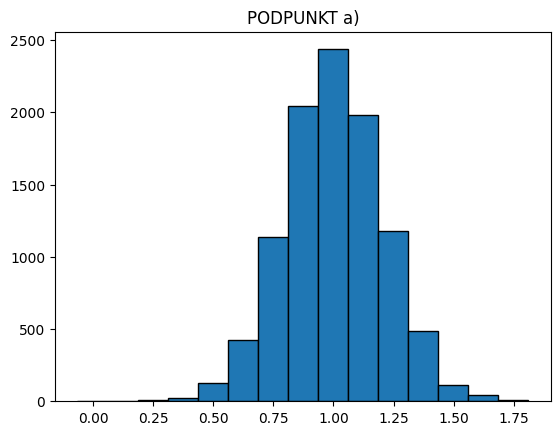

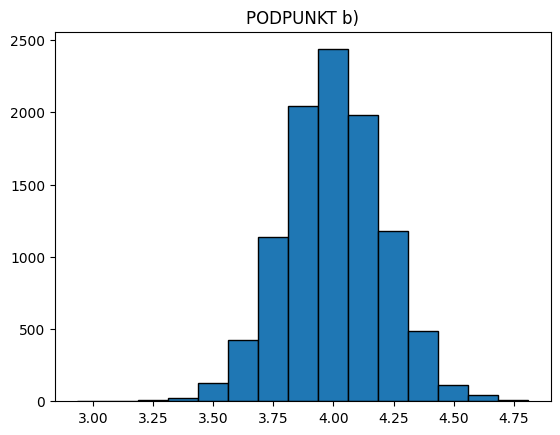

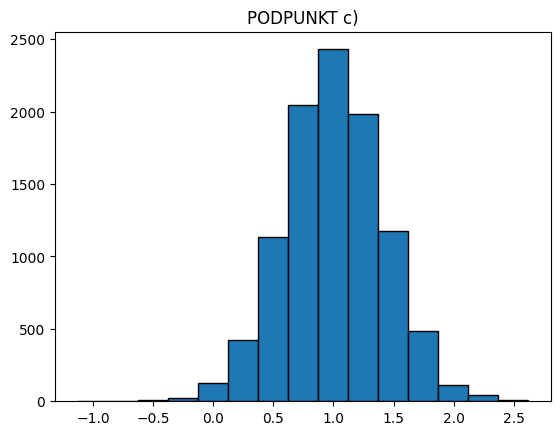

In [13]:
import numpy as np


from scipy.stats import cauchy

n=50
N=10000
theta=[1,4,1]
sigma=[1,1,2]
name=['a)', 'b)', 'c)']

def log_likelihood(theta, x):
    return -np.sum(np.log(1 + (x - theta)**2))

def mle_cauchy(x, sigma, toler=1e-3,maxiter=5):
    thetahat_curr =np.median(x)
    iter=0
    
    while True:
        # first derivative of log likelihood
        w=(x - thetahat_curr)
        first_deriv_ll = np.sum( w/ (1 + (w/sigma)**2))
        
        # second derivative of log likelihood
        second_deriv_ll = np.sum(((w/sigma)**2 - 1) / (1 + ((w/sigma)**2)**2))
        
        
        thetahat_new = thetahat_curr - first_deriv_ll / second_deriv_ll

        iter+=1
        
        if np.abs(thetahat_new - thetahat_curr) < toler or iter==maxiter:
            break
        
        thetahat_curr = thetahat_new
    
    return thetahat_curr

for j in range(3):
    print('Podpunkt',name[j])
    est=[]
    for i in range(N):
        np.random.seed(i)
        data=np.random.standard_cauchy(n)
        data=theta[j]+data*sigma[j]
        est.append(mle_cauchy(data,sigma[j]))
    est=np.array(est)
    plt.figure()  
    plt.hist(est, bins=15, edgecolor='black')
    plt.title('PODPUNKT '+name[j])
    print('Wariancja estymatora', est.var())
    print('Wariancja estymatora', est.var())
 
    true=np.full(N,theta[j])
    errors=est-true
    squared=errors**2
    mse=np.mean(squared)
    o=np.mean(est)-theta[j]
    
        
    print('Błąd średniokwadratowy estymatora', mse)
    print('Obciążenie estymatora', o)



Podpunkt a)
Wariancja estymatora 0.04187090317214634
Błąd średniokwadratowy estymatora 0.0418755769938863
Obciążenie estymatora 0.002161902342834532
Podpunkt b)
Wariancja estymatora 0.04187090317214655
Błąd średniokwadratowy estymatora 0.0418755769938865
Obciążenie estymatora 0.00216190234283431
Podpunkt c)
Wariancja estymatora 0.16748361268858522
Błąd średniokwadratowy estymatora 0.167502307975545
Obciążenie estymatora 0.004323804685669064


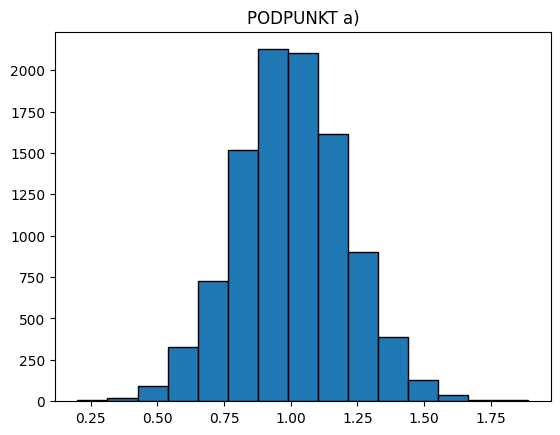

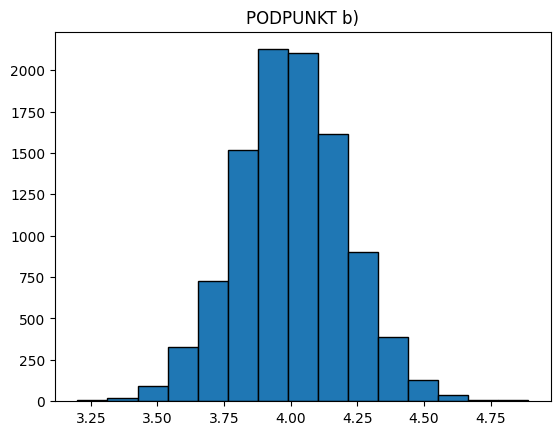

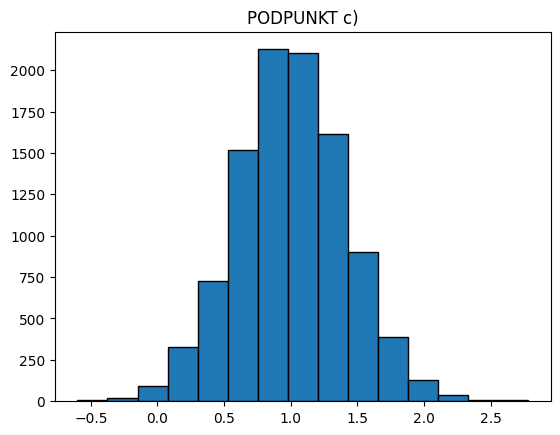

In [7]:
import numpy as np
from scipy import optimize
from scipy.stats import cauchy

n = 50
N = 10000
theta = [1, 4, 1]
sigma = [1, 1, 2]
name = ['a)', 'b)', 'c)']

def likelihood_function(theta, sigma, data):
    sum=0
    for i in data:
        w=(i-theta)/sigma
        sum+=(i-theta)/(1+(w**2))
    return sum

for j in range(3):
    print('Podpunkt', name[j])
    est = []
    for i in range(N):
        np.random.seed(i)
        data = cauchy.rvs(loc=theta[j], scale=sigma[j], size=n)

        # Metoda siecznych
        result = optimize.root_scalar(lambda x: likelihood_function(x, sigma[j], data),bracket=[min(data), max(data)], x0=np.median(data), method='secant')
        est.append(result.root)

    est = np.array(est)
    plt.figure()  
    plt.hist(est, bins=15, edgecolor='black')
    plt.title('PODPUNKT '+name[j])
    print('Wariancja estymatora', est.var())
    

    true=np.full(N,theta[j])
    errors=est-true
    squared=errors**2
    mse=np.mean(squared)
    o=np.mean(est)-theta[j]
    
        
    print('Błąd średniokwadratowy estymatora', mse)
    print('Obciążenie estymatora', o)


Możemy zaobserwować, że zarówno metoda siecznych, jak i metoda Newtona zbiegają szybko i z dużą odkładnością dla dobrego punktu początkowego, jakim jest mediana próbki. Podobnie jak w poprzednim zadaniu, wystarcza niewielka ($\leq5$) liczba iteracji algorytmu. Natomiast dla ustalonego innego $\theta_0$, np. $\theta_0=0$ żadna z metod nie zbiega, nawet w większej liczbie iteracji.

### Zadanie 7

Uruchamiając powyższe programy dla $ n=20,50,100 $ możemy dojść do następujących wniosków:

* W przypadku **zadania 1**:  rząd błedu kwadratowego, wariancji i obciążenia nie zmienia się,
  ale możemy zaobserwować większą dokładność wraz ze wzrostem n. To zgadza się z naszą wiedzą z teorii - np. efektywność estymatora $\theta_0$ w przypadku tego rozkładu  wynosi 1.

* W przypadku **zadania 5** i metody Newtona:

    * dla **n=100** obciażenie jest rzędu $ 10^{-5}$, 
        
    * dla **n=50** rzędu $10^{-3}$, 
        
    * dla **n=20** rzędu $10^{-2},10^{-3}$.
      
    Przy zwiększeniu n z 20 do 100 dla błędu kwadratowego i wariancji też dostajemy dokładniejsze estymacje - średnio o jedno miejsce dziesiętne.

  W podręczniku Hogga możemy przeczytać:

*The estimate $ \hat{\theta_{1}}$ 
in equation $ \hat{\theta_{1}}= \hat{\theta_0} - \frac{l'(\hat{\theta_0})}{l''(\hat{\theta_0})} $ is called the one-step estimator. As Exercise 6.2.13 shows, this estimator has the same asymptotic distribution as the mle, i.e. (6.2.18), provided that the
initial guess $ \hat{\theta_0} $ is a consistent estimator of $\theta$. That is, the one-step estimate is an
asymptotically efficient estimate of $\theta$. This is also true of the other iterative steps.*




Wobec tego nasze wyniki są zgodne z asymptotycznymi  własnościami estymatora oraz zastosowanej metody Newtona.

* W przypadku **zadania 6** i metody Newtona dla **n=20** obciążenie, błąd kwadratowy i wariancja są na tyle duże, że możemy stwierdzić, że metoda Newtona nie zbiega. Dla **n=100** obciążenie maleje o 2 miejsca dziesiętne, a wariancja i błąd średniokwadratowy - dwukrotnie ( w porównaniu do **n=50**).

Poprawność naszych obserwacji potwierdza artykuł dotyczący rozkładu Cauchy'ego z angielskiej wikipedii: 

*Also, while the maximum likelihood estimator is asymptotically efficient, it is relatively inefficient for small samples.* 

Możemy także doczytać więcej o własnościach tego rozkładu:

*Therefore, more robust means of estimating the central value $ \theta$  and the scaling parameter $\sigma$ are needed. One simple method is to take the median value of the sample as an estimator of $\theta$ and half the sample interquartile range as an estimator of $\sigma$ . For example, the truncated mean of the middle 24% of the sample order statistics produces an estimate for $\theta$ that is more efficient than using either the sample median or the full sample mean. However, because of the fat tails of the Cauchy distribution, the efficiency of the estimator decreases if more than 24% of the sample is used.*

To uzasadnia poprawność naszego wyboru punktu początkowego (mediany) w metodzie Newtona dla algorytmu Cauchy'ego. Jednak, jak widać, istnieją nawet jeszcze bardziej efektywne metody.

**Podsumowując**: większe próbki pozwalają na uzyskanie większej dokładności. Większa próba jest zazwyczaj bardziej reprezentatywna i ma mniejszy błąd próbkowania, co oznacza, że estymatory są bardziej dokładne.